**Корректность проверена на Python 3.7:**
+ pandas 0.23.0
+ numpy 1.14.5

# Доверительные интервалы на основе bootstrap

In [1]:
import numpy as np
import pandas as pd

In [2]:
print(np.__version__)
print(pd.__version__)

1.19.4
1.1.4


In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Загрузка данных

### Время ремонта телекоммуникаций

Verizon — основная региональная телекоммуникационная компания (Incumbent Local Exchange Carrier, ILEC) в западной 
части США. В связи с этим данная компания обязана предоставлять сервис ремонта телекоммуникационного оборудования 
не только для своих клиентов, но и для клиентов других локальных телекоммуникационых компаний (Competing Local Exchange Carriers, CLEC). При этом в случаях, когда время ремонта оборудования для клиентов других компаний существенно выше, чем для собственных, Verizon может быть оштрафована. 

In [4]:
data = pd.read_csv('verizon.txt', sep='\t')
data.shape

(1687, 2)

In [5]:
data.head()

,Time,Group
0,17.50,ILEC
1,2.40,ILEC
2,0.00,ILEC
3,0.65,ILEC
4,22.23,ILEC


In [6]:
data.Group.value_counts()

ILEC    1664
CLEC      23
Name: Group, dtype: int64

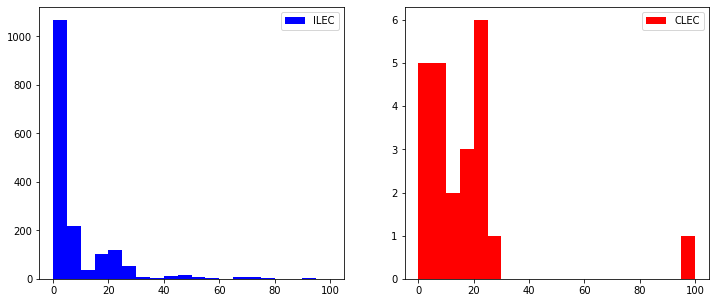

In [7]:
pylab.figure(figsize(12, 5))
pylab.subplot(1,2,1)
pylab.hist(data[data.Group == 'ILEC'].Time, bins = 20, color = 'b', range = (0, 100), label = 'ILEC')
pylab.legend()

pylab.subplot(1,2,2)
pylab.hist(data[data.Group == 'CLEC'].Time, bins = 20, color = 'r', range = (0, 100), label = 'CLEC')
pylab.legend()

pylab.show()

## Bootstrap

In [110]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [111]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

### Интервальная оценка медианы

In [10]:
ilec_time = data[data.Group == 'ILEC'].Time.values
clec_time = data[data.Group == 'CLEC'].Time.values

In [11]:
np.random.seed(0)

ilec_median_scores = list(map(np.median, get_bootstrap_samples(ilec_time, 1000)))
clec_median_scores = list(map(np.median, get_bootstrap_samples(clec_time, 1000)))

print("95% confidence interval for the ILEC median repair time:",  stat_intervals(ilec_median_scores, 0.05))
print("95% confidence interval for the CLEC median repair time:",  stat_intervals(clec_median_scores, 0.05))

95% confidence interval for the ILEC median repair time: [3.18    3.82525]
95% confidence interval for the CLEC median repair time: [ 5.79125 20.     ]


### Точечная оценка разности медиан

In [12]:
print("difference between medians:", np.median(clec_time) - np.median(ilec_time))

difference between medians: 10.74


### Интервальная оценка разности медиан

In [13]:
delta_median_scores = list(map(lambda x: x[1] - x[0], zip(ilec_median_scores, clec_median_scores)))

In [31]:
print("95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05))

95% confidence interval for the difference between medians [ 2.04975 16.63   ]


#### Для теста

In [35]:
sample1 = np.c_[np.ones((1,104)), np.zeros((1,11037))].flatten()
sample2 = np.c_[np.ones((1,189)), np.zeros((1,11034))].flatten()

In [42]:
sample1[:110]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0.])

In [44]:
sample2[:190]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0.])

In [59]:
tt = get_bootstrap_samples(sample1, 1000)[0]

In [112]:
np.random.seed(0)
s1_chance_scores = list(map(lambda x: sum(x)/(len(x) - sum(x)), get_bootstrap_samples(sample1, 1000)))
s2_chance_scores = list(map(lambda x: sum(x)/(len(x) - sum(x)), get_bootstrap_samples(sample2, 1000)))

In [113]:
div_chance_scores = list(map(lambda x: x[1]/x[0], zip(s1_chance_scores, s2_chance_scores)))

In [114]:
div_chance_scores

[1.6380060886899035,
 1.7616275733358615,
 1.9502194715864183,
 2.099736213437484,
 1.680751618376188,
 1.5816112269252844,
 1.7816940618267203,
 2.0473068089205007,
 1.5343572195917718,
 1.8487917136208005,
 1.4830945833983742,
 1.646357493754506,
 1.378681338267246,
 2.076865437530237,
 2.2114980040575305,
 1.6404174793735815,
 1.9536350280315322,
 1.716658495663484,
 1.6404174793735815,
 1.5368963835272804,
 1.6050038183206663,
 1.7448086712454745,
 1.7786849972821164,
 1.882381657906568,
 2.0239372702884766,
 1.8310816411106505,
 1.6301006661802646,
 1.7862459400343178,
 1.6192209740168428,
 1.6019974387583746,
 1.721222928172013,
 2.147443006947139,
 1.6165574526200601,
 1.8637431034687035,
 1.9082532133604064,
 1.6311054443664574,
 1.76836415019936,
 2.035177180130976,
 1.7977643223102002,
 1.4756445531050293,
 2.0334521431166004,
 1.6139206090266451,
 1.7488912020275165,
 1.9809200391100086,
 1.9036852931398327,
 1.82,
 1.7617009389008054,
 1.651750972762646,
 1.5103229584115951

In [115]:
stat_intervals(div_chance_scores, 0.05)

array([1.43555491, 2.34742089])

In [116]:
stat_intervals(div_chance_scores, 0.05)[0].round(4)

1.4356